# Exercise 4.1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## 4.1(a)

Describe the dataset by printing the summary statistics for the columns (i.e., all the input features)?
Typical examples include count, mean, std, min, max, upper and lower percentiles. Refer to the tutorial
in Section 4.2.7 for some useful built-in methods from Pandas.
Note: UCI HAR Dataset/train/X train.txt and UCI HAR
Dataset/test/X test.txt are the training and testing data with all the input features.

In [67]:
x_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",sep="\s+",header=None)
df_xtrain = pd.DataFrame(x_train)
df_xtrain.transpose()


data = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep = "\s+", header=None)
df_ytrain = pd.DataFrame(data)

headers = pd.read_csv("./UCI HAR Dataset/features.txt", sep = "\s+", header=None)
df_xtrain.columns = headers[1]
df_ytrain.columns=["Label"]

df_combined = pd.concat([df_ytrain,df_xtrain],axis=1)

data_description = df_xtrain.describe()
print (data_description)

1      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

1      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


## 4.1(b)
Plot the number of datapoints for each user activity (i.e., output class) as a histogram. Report if the
data set balanced or not.
Note: train/y train.txt and test/y test.txt has the output classes (i.e., groundtruth or
labels).

1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: Label, dtype: int64


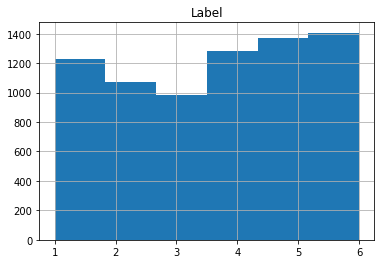

In [49]:
df_ytrain.hist(bins=6)
print (df_ytrain["Label"].value_counts().sort_index())

The set of data is slightly imbalanced with activity 2 and 3 having more than 10% fewer data points

## 4.1(c)

Plot some of the derived features (atleast 10) and compare it for different user activities (i.e., output
class). Report whether it is possible to discriminate between activities based on those chosen derived
features. Visually inspect and report the nature of distributions (e.g., normal distribution or not,
skewness, modality, etc.) for atleast 10 derived features.

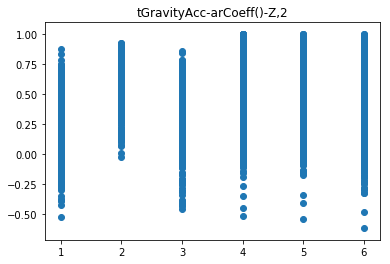

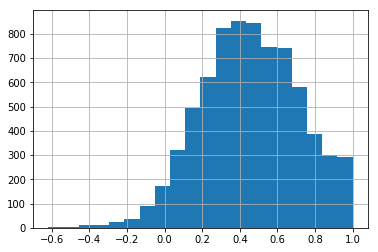

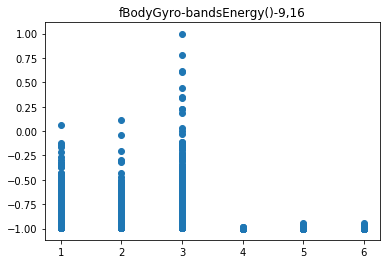

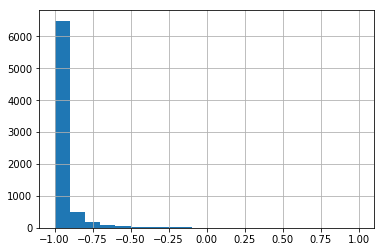

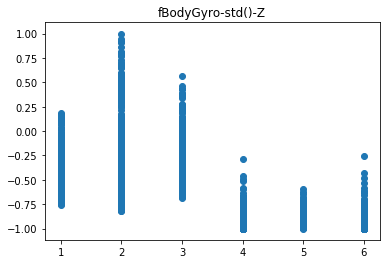

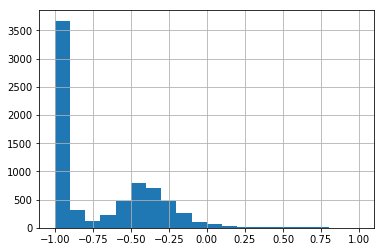

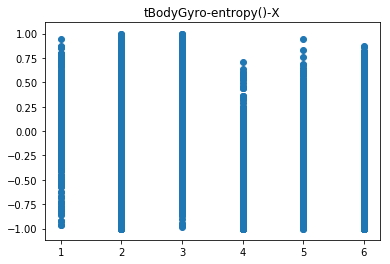

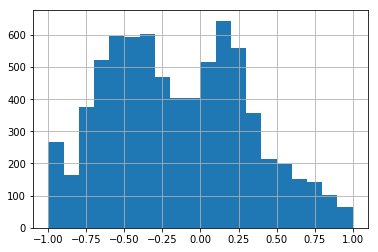

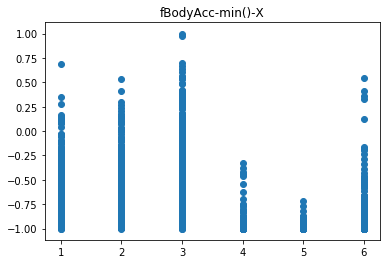

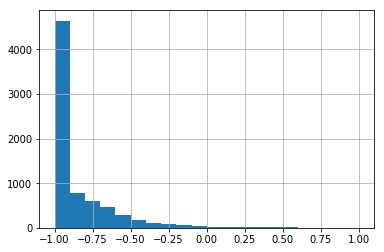

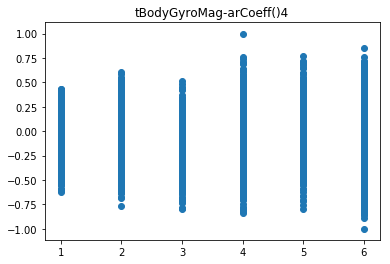

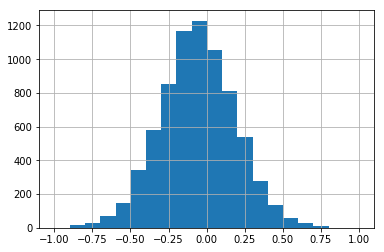

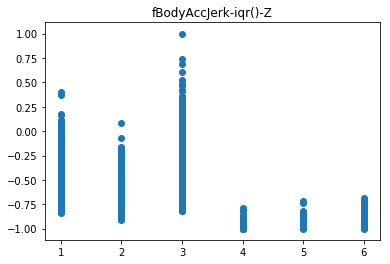

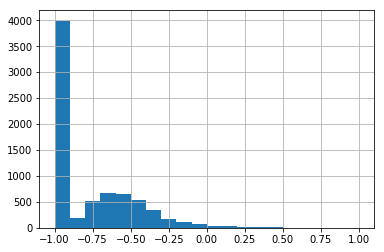

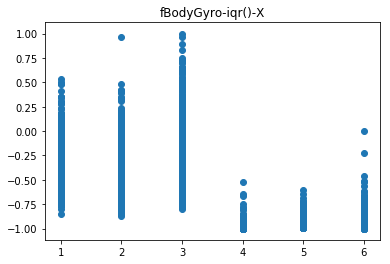

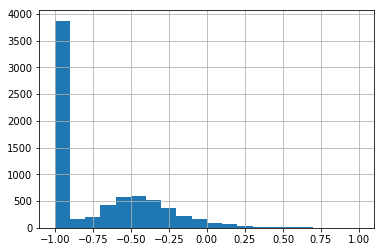

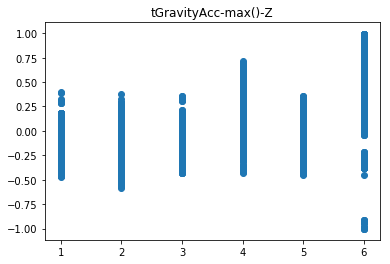

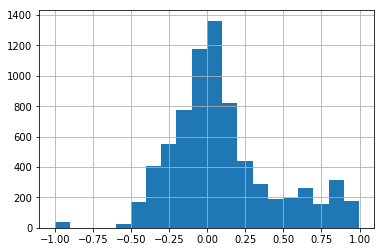

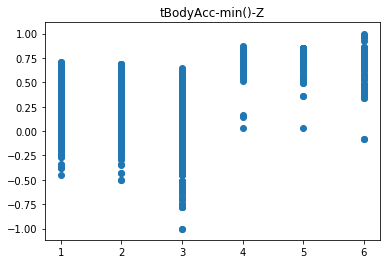

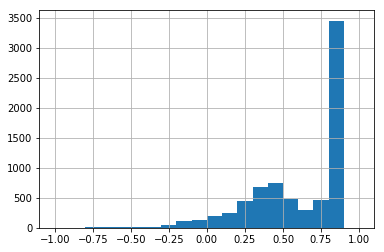

In [63]:
random.seed(1)
r = random.sample(range(0,df_combined.shape[1]),10)

for i in range(10):
    plt.scatter(df_combined['Label'],df_combined.iloc[:,r[i]])
    plt.title(df_combined.columns[r[i]])
    plt.show()
    a = pd.Series(df_combined.iloc[:,r[i]])
    a.hist(bins=20,)
    plt.show()

**Derived Features**<br>
1.tGravityAcc-arCoeff()-Z,2<br>
  -Cannot visually discriminate bewteen activites<br>
  -Seems normally distributed with left skew<br>
  -Unimodal<br><br>
2.fBodyGyro-bandsEnergy()-9,16<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, right skewed <br>
  -Unimodal<br><br>
3.fBodyGyro-std()-Z<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, right skewed  <br>
  -Unimodal<br><br>
4.tBodyGyro-entropy()-X<br>
  -Cannot visually discriminate bewteen activites<br>
  -Not normally distributed, right skewed  <br>
  -Bimodal<br><br>
5.fBodyAcc-min()-X<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, right skewed  <br>
  -Unimodal<br><br>
6.tBodyGyroMag-arCoeff()4<br>
  -Cannot visually discriminate bewteen activities<br>
  -Normally distributed with no skew<br>
  -Unimodal<br><br>
7.fBodyAccJerk-iqr()-Z<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, right skewed  <br>
  -Bimodal<br><br>
8.fBodyGyro-iqr()-X<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, right skewed  <br>
  -Bimodal<br><br>
9.tGravityAcc-max()-Z<br>
  -Cannot visually discriminate bewteen activities except for activity 6 when below -0.55<br>
  -Normally distributed with no skew<br>
  -Unimodal<br><br>
10.tBodyAcc-min()-Z<br>
  -Can visually discriminate between activity groups (1,2,3) and (4,5,6)<br>
  -Not normally distributed, left skewed <br>
  -Bimodal<br><br>